In [238]:
!pip install seaborn matplotlib scikit-learn

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('float_format', '{:f}'.format)
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [ ]:
print(os.environ['TNS_ADMIN'])

In [239]:
df = pd.read_json('C:\\Users\\nache\\1v1s.json')

df.head(5)

,match_id,champ1,champ2,win
0,EUN1_2910807891_utility,Velkoz,Yuumi,1
1,EUN1_2910807891_jungle,Shaco,Nidalee,1
2,EUN1_2909987530_top,Riven,Sett,0
3,EUN1_2909987530_middle,Lissandra,Kassadin,0
4,EUN1_2909987530_bottom,Ashe,Ezreal,0


In [240]:
df['champ1'].unique() # all champion names

array(['Velkoz', 'Shaco', 'Riven', 'Lissandra', 'Ashe', 'Braum', 'Graves',
       'Akali', 'Corki', 'Ziggs', 'Senna', 'Udyr', 'Vladimir', 'Zed',
       'Draven', 'Thresh', 'Nocturne', 'Jax', 'Camille', 'Kassadin',
       'Aphelios', 'Akshan', 'Lucian', 'Ezreal', 'Lux', 'Evelynn',
       'Vayne', 'Nami', 'Nunu', 'Malphite', 'Pyke', 'Elise', 'MonkeyKing',
       'Jinx', 'Sett', 'Yone', 'Kaisa', 'Taric', 'Morgana', 'Viego',
       'Viktor', 'Rell', 'Nidalee', 'Seraphine', 'Galio', 'Diana',
       'Renekton', 'Sylas', 'Amumu', 'DrMundo', 'LeeSin', 'Samira',
       'Janna', 'Khazix', 'Jayce', 'Ryze', 'Alistar', 'Volibear',
       'Caitlyn', 'RekSai', 'Gwen', 'Kennen', 'Twitch', 'Yuumi', 'Irelia',
       'Kayn', 'Sion', 'Rumble', 'Katarina', 'Tristana', 'Leblanc',
       'Lulu', 'JarvanIV', 'Malzahar', 'Gangplank', 'Jhin', 'Karma',
       'MasterYi', 'KogMaw', 'Fiora', 'Leona', 'Kindred', 'Soraka',
       'Warwick', 'Nasus', 'Shen', 'Zilean', 'Ekko', 'XinZhao',
       'Tryndamere', 'Anivia',

In [241]:
champ_list = df['champ1'].unique().tolist()

print(type(champ_list))

<class 'list'>


In [242]:
print(champ_list)

['Velkoz', 'Shaco', 'Riven', 'Lissandra', 'Ashe', 'Braum', 'Graves', 'Akali', 'Corki', 'Ziggs', 'Senna', 'Udyr', 'Vladimir', 'Zed', 'Draven', 'Thresh', 'Nocturne', 'Jax', 'Camille', 'Kassadin', 'Aphelios', 'Akshan', 'Lucian', 'Ezreal', 'Lux', 'Evelynn', 'Vayne', 'Nami', 'Nunu', 'Malphite', 'Pyke', 'Elise', 'MonkeyKing', 'Jinx', 'Sett', 'Yone', 'Kaisa', 'Taric', 'Morgana', 'Viego', 'Viktor', 'Rell', 'Nidalee', 'Seraphine', 'Galio', 'Diana', 'Renekton', 'Sylas', 'Amumu', 'DrMundo', 'LeeSin', 'Samira', 'Janna', 'Khazix', 'Jayce', 'Ryze', 'Alistar', 'Volibear', 'Caitlyn', 'RekSai', 'Gwen', 'Kennen', 'Twitch', 'Yuumi', 'Irelia', 'Kayn', 'Sion', 'Rumble', 'Katarina', 'Tristana', 'Leblanc', 'Lulu', 'JarvanIV', 'Malzahar', 'Gangplank', 'Jhin', 'Karma', 'MasterYi', 'KogMaw', 'Fiora', 'Leona', 'Kindred', 'Soraka', 'Warwick', 'Nasus', 'Shen', 'Zilean', 'Ekko', 'XinZhao', 'Tryndamere', 'Anivia', 'Ahri', 'Xerath', 'Kled', 'Pantheon', 'Hecarim', 'Nautilus', 'Talon', 'FiddleSticks', 'Yorick', 'Annie'

In [243]:
# Data Exploration
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
win,761720.000000,0.486769,0.499825,0.000000,0.000000,0.000000,1.000000,1.000000


In [244]:
print(df.columns)

Index(['match_id', 'champ1', 'champ2', 'win'], dtype='object')


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761720 entries, 0 to 761719
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   match_id  761720 non-null  object
 1   champ1    761720 non-null  object
 2   champ2    761720 non-null  object
 3   win       761720 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 23.2+ MB


In [246]:
# Cleaning data
df.isna().sum()

match_id    0
champ1      0
champ2      0
win         0
dtype: int64

In [247]:
df = df.dropna() # we drop these null values and corresponding rows.

E:\Programs\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


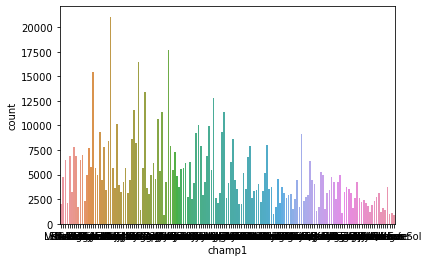

In [248]:
sns.countplot(df['champ1'], label="Count")
plt.show()

In [249]:
df.head(5)

,match_id,champ1,champ2,win
0,EUN1_2910807891_utility,Velkoz,Yuumi,1
1,EUN1_2910807891_jungle,Shaco,Nidalee,1
2,EUN1_2909987530_top,Riven,Sett,0
3,EUN1_2909987530_middle,Lissandra,Kassadin,0
4,EUN1_2909987530_bottom,Ashe,Ezreal,0


In [250]:
# Drop match_id column
df = df.drop(['match_id'], axis=1)

In [251]:
df.head(5)

,champ1,champ2,win
0,Velkoz,Yuumi,1
1,Shaco,Nidalee,1
2,Riven,Sett,0
3,Lissandra,Kassadin,0
4,Ashe,Ezreal,0


In [252]:
train_dataset = df.sample(frac=0.8, random_state=0) # 80-20 train-test splitting.
test_dataset = df.drop(train_dataset.index) # drop all rows present in the train dataset.

In [253]:
# Let's look at the shape of our dataset after removing and modifying column values.
df.head(5)

,champ1,champ2,win
0,Velkoz,Yuumi,1
1,Shaco,Nidalee,1
2,Riven,Sett,0
3,Lissandra,Kassadin,0
4,Ashe,Ezreal,0


In [254]:
# Splitting features (what we use to predict) from labels (what we want to predict)
# We want to predict the 'win' variable.
# The rest of variables will be inputs.

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('win') # returns column 'win'
test_labels = test_features.pop('win') # returns column 'win'

In [255]:
le = LabelEncoder()

le = le.fit(champ_list) # fit the label encoder with the whole champion list.
#le.classes_

train_features = train_features.apply(lambda x: le.transform(x))
test_features = test_features.apply(lambda x: le.transform(x))

In [256]:
# Normalization
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [257]:
logreg = LogisticRegression()
logreg.fit(train_features, train_labels)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(train_features, train_labels)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(test_features, test_labels)))

Accuracy of Logistic regression classifier on training set: 0.51
Accuracy of Logistic regression classifier on test set: 0.51


In [258]:
logreg.predict(test_features)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [260]:
new_data = {
    'champ1': ['Xayah', 'Karma', 'Xerath', 'Gragas', 'Chogath'],
    'champ2': ['Tristana', 'Lulu', 'Syndra', 'Sejuani', 'Gnar']
}
new_df = pd.DataFrame(new_data)

In [261]:
#le.transform(new_df['champ1'])

new_df = new_df.apply(lambda x: le.transform(x))

In [262]:
new_df.tail(5)

,champ1,champ2
0,143,126
1,52,69
2,144,119
3,36,104
4,19,35


In [265]:
result = logreg.predict(new_df)
print(result)

[0 0 0 0 0]


In [266]:
inverse_prediction = new_df.apply(lambda x: le.inverse_transform(x))

In [268]:
def find_winner(lst):
    return max(set(lst), key=lst.count)

In [269]:
winner_prediction = find_winner(result.tolist())

In [270]:
if winner_prediction == 1:
    print('Predicted winner is team 1: \n{}'.format(str(inverse_prediction['champ1'])))
else:
     print('Predicted winner is team 2: \n{}'.format(str(inverse_prediction['champ2'])))


Predicted winner is team 2: 
0    Tristana
1        Lulu
2      Syndra
3     Sejuani
4        Gnar
Name: champ2, dtype: object
